In [2]:
!pip install folium

     |████████████████████████████████| 96 kB 1.2 MB/s eta 0:00:01


In [2]:
import copy
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join as pjoin

warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib
matplotlib.font_manager._rebuild()
matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
import os

ROOT_PATH = os.path.abspath("..")

DATA = pjoin(ROOT_PATH, "data")
RAW_DATA = pjoin(DATA, "raw")
PROC_DATA = pjoin(DATA, "proc")

## **수원시 생물 데이터**
2005 ~ 2020년도 개체수 관측 데이터

- 저서성 무척추 동물

In [5]:
suwon_invert = pd.read_csv(pjoin(PROC_DATA, "저서무척추.csv"))
suwon_invert

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수
0,32381,37.301556,126.984500,모기과,숲모기류,Aedes sp.,2019,2019-05-16,1
1,30207,37.312402,127.020045,모기과,숲모기류,Aedes sp.,2015,2015-11-09,1
2,35639,37.300306,126.944611,왕잠자리과,긴무늬왕잠자리,Aeschnophlebia longistigma,2019,2019-05-13,1
3,32009,37.247389,127.018727,왕잠자리과,왕잠자리류,Aeshnidae sp.,2020,2020-10-19,1
4,30949,37.247389,127.018727,왕잠자리과,왕잠자리류,Aeshnidae sp.,2020,2020-10-19,1
...,...,...,...,...,...,...,...,...,...
6684,32602,37.263944,126.989000,물땡땡이과,애넓적물땡땡이,Enochrus (Holcophilydrus) simulans,2016,2016-06-14,1
6685,30975,37.254961,127.009031,돌거머리과,돌거머리,Erpobdella lineata,2016,2016-04-25,1
6686,33316,37.311778,126.982028,장구애비과,장구애비,Laccotrephes japonensis,2019,2019-10-14,1
6687,33078,37.252722,126.994583,실지렁이과,실지렁이,Limnodrilus gotoi,2020,2020-07-21,1


### **결측치 확인**
결측치 없음

In [6]:
suwon_invert.isna().sum()

id       0
위도       0
경도       0
한글과명     0
한글보통명    0
학명       0
조사연도     0
조사일자     0
개체수      0
dtype: int64

### **데이터 확인**

개체 확인

In [7]:
suwon_invert['한글보통명'] = suwon_invert['한글보통명'].apply(lambda x: x.lower())
suwon_invert['학명'] = suwon_invert['학명'].apply(lambda x: x.lower())

In [8]:
len(suwon_invert['한글과명'].unique()), suwon_invert['한글과명'].unique()

(80,
 array(['모기과', '왕잠자리과', '물방개과', '넙적거머리과', '피라미하루살이과', '석패과', '애우묵날도래과',
        '물장군과', '소금쟁이과', '돌조개과', '물벌레과', '물잠자리과', '물달팽이과', '꼬마하루살이과',
        '등딱지하루살이과', '가재과', '물지렁이과', '줄날도래과', '깔따구과', '논우렁이과', '방울실잠자리과',
        '재첩과', '뱀잠자리과', '잠자리과', '검물벼룩과', '측범잠자리과', '플라나리아과', '납작하루살이과',
        '별날도래과', '물땡땡이과', '하루살이과', '물가파리과', '청동잠자리과', '잔산잠자리과', '꽃등에과',
        '돌거머리과', '옆새우과', '광택날도래과', '또아리물달팽이과', '물맴이과', '거머리과', '애날도래과',
        '청실잠자리과', '실잠자리과', '장구애비과', '애기각다귀과', '네모집날도래과', '나비날도래과',
        '우묵날도래과', '실지렁이과', '징거미새우과', '산골과', '민강도래과', '새뱅이과', '자색물방개과',
        '송장헤엄치게과', '바수염날도래과', '동애등에과', '뾰족쨈물우렁이과', '쇠우렁이과', '갈래하루살이과',
        '물진드기과', '강도래과', '날도래과', '왼돌이물달팽이과', '사과우렁이과', '나방파리과', '물날도래과',
        '다슬기과', '물벼룩과', '각날도래과', '등에과', '각다귀과', '별모기과', '먹파리과', '하루살이목',
        '진흙씨벌레과', '잎새우과', '구슬우렁이과', '잔벌레과'], dtype=object))

조사일자에 따른 개체 관측 수 비교

In [9]:
suwon_invert['조사일자'] = pd.to_datetime(suwon_invert['조사일자'], format="%Y-%m-%d")

In [10]:
suwon_invert.sort_values(by=['조사일자'], inplace=True)

### **수질 측정 지점 좌표**

In [11]:
locations = {
    # 호소
    "만석거저수지" : (37.299787417178294, 127.00107149707705),
    "서호저수지" : (37.27709955522582, 126.98788556989942),
    "일월저수지" : (37.288194255309335, 126.97282198213011),
    "원천저수지": (37.27924580337641, 127.06319437472024),
    "신대저수지" : (37.2866353582715, 127.07385952791883),
    "하광교저수지" : (37.30618224052736, 127.02853356302887),
    "왕송저수지" : (37.30711179596621, 126.94906398633734),
    
    # 하천
    "수원천_상류(연화교)" : (37.29612735369229, 127.02555678644674),
    "수원천_중류(매세교)" : (37.26819681755253, 127.01594623271359),
    "수원천_하류(새터교)" : (37.25313564842138, 127.00989677944673),
    "원천천_상류(원천교)" : (37.26967759959319, 127.06158991920644),
    "원천천_중류(백년교)" : (37.250998292790314, 127.04270598847535),
    "원천천_하류(대황교)" : (37.22677630438373, 127.02366737828959),
    "서호천_상류(배다리교)" : (37.31188246137487, 126.98201852724755),
    "서호천_중류(한마루교)" : (37.291883858170074, 126.9884290422339),
    "서호천_중류(화산교)" : (37.28417404422269, 126.98390605646173),
    "서호천_하류(농대교)" : (37.2679883074196, 126.98866720238026),
    "서호천_하류(중보교)" : (37.254912757402806, 126.9937912594934),
    "황구지천_상류(금곡교)" : (37.27276925556412, 126.96254483334667),
    "황구지천_중류(오목천교)" : (37.24767899457983, 126.96942363671519),
    "황구지천_하류(기안교)" : (37.23400089147493, 126.9883522489194),
    "서호천_하류(중보교합류)" : (37.2549343933706, 126.9940031755733),
    "왕송저수지_유하후" : (),
    "영화천" : (37.32355376874568, 126.9922963311313),
    "일월저수지_유하후" : (),
    "호매실천" : (37.25828545499758, 126.96708364144865), # 황구지천 상중
    "여천" : (37.2895652818843, 127.0617143889462),
    "가산천" : (37.29131865302158, 127.0771571795067),   
}

***2017년도 이후 데이터 관측***  

- 수원시 하천 수질 데이터에 따르면 2017년도부터 하천 수질 측정 지점 명시 (00교)

In [12]:
suwon_total_17_20 = suwon_invert[suwon_invert['조사연도'] >= 2017]
suwon_total_17_20

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수
2668,35357,37.242667,126.971056,실잠자리과,아시아실잠자리,ischnura asiatica,2017,2017-03-01,1
172,34964,37.272694,126.962167,석패과,펄조개,anodonta woodiana,2017,2017-03-01,1
2562,36154,37.251111,126.971111,실잠자리과,아시아실잠자리,ischnura asiatica,2017,2017-03-01,1
5667,35459,37.300306,126.944611,각다귀과,각다귀류,tipulidae sp.,2017,2017-03-01,1
3315,34919,37.272694,126.962167,새뱅이과,새뱅이,neocaridina denticulata denticulata,2017,2017-03-01,1
...,...,...,...,...,...,...,...,...,...
3023,30088,37.300007,127.029051,우묵날도래과,우묵날도래류,limnephilidae sp.,2020,2020-11-18,20
1052,29857,37.300007,127.029051,깔따구과,깔따구류 (붉은색),chironomidae sp. (red type),2020,2020-11-18,2
1873,30476,37.285000,127.017778,돌거머리과,돌거머리,erpobdella lineata,2020,2020-11-18,3
2438,31324,37.254961,127.009031,줄날도래과,줄날도래류,hydropsychidae sp.,2020,2020-11-18,50


## **수질 데이터**

- BOD (생화학적 산소요구량) : 물속의 미생물이 오염물을 분해하기 위해 필요한 산소량

- COD (화학적 산소요구량) : 물속의 오염물을 산화제 등의 화학물질을 이용해 산화시킬때 필요한 산소량

- SS (부유물질량) : 물속의 이물질량 (분뇨 덩어리, 흙 등)

- T-N : 총 질소(Total Nitrogen)

- T-P : 총 인(Total Phosphorus)

In [13]:
hoso = pd.read_csv(pjoin(PROC_DATA, "호소.csv"), parse_dates=['date'])
hoso

,name,PH,SS,T-N,T-P,CHL-A,date,COD,TOC,DO,EC (MS/CM),NH3-N (MG/L),수온
0,만석거저수지,7.65,7.600000,5.4240,0.0590,31.7,2015-01-01,6.800,NaN,NaN,NaN,NaN,NaN
1,서호저수지,8.66,22.000000,10.4340,0.1490,89.3,2015-01-01,10.800,NaN,NaN,NaN,NaN,NaN
2,일월저수지,9.66,14.400000,5.4800,0.2300,118.1,2015-01-01,12.000,NaN,NaN,NaN,NaN,NaN
3,신대저수지,7.66,5.600000,2.1820,0.0660,31.5,2015-01-01,9.600,NaN,NaN,NaN,NaN,NaN
4,원천저수지,8.04,3.600000,1.0010,0.0120,8.5,2015-01-01,4.700,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,서호저수지,7.40,23.000000,5.1960,0.1037,261.3,2019-08-01,29.000,11.1550,6.03,0.3450,0.914,31.3
510,서호저수지,8.09,18.666667,4.4920,0.0679,142.4,2019-09-01,14.000,5.0540,10.12,0.1978,0.011,23.7
511,서호저수지,9.46,26.000000,5.9400,0.0854,170.0,2019-10-01,34.010,10.6769,10.30,0.4510,0.056,20.5
512,서호저수지,8.80,22.800000,6.7100,0.0700,151.3,2019-11-01,26.980,9.9000,11.09,0.5430,0.09,13.0


In [14]:
hoso['name'].unique()

array(['만석거저수지', '서호저수지', '일월저수지', '신대저수지', '원천저수지', '오목천소류지', '만석거소류지',
       '하광교저수지', '일월저수지(방류)', '서호저수지(유입)', '원천저수지(방류)', '왕송저수지',
       '서호저수지(방류)', '만석거저수지(방류)', '신대저수지(방류)', '하광교소류지'], dtype=object)

In [15]:
river = pd.read_csv(pjoin(PROC_DATA, "하천.csv"), parse_dates=['date'])
river

,name,PH,BOD,SS,T-N,T-P,date,TOC,DO,EC (MS/CM),수온
0,수원천,7.696667,1.933333,11.633333,8.805333,0.078333,2015-01-01,NaN,NaN,NaN,NaN
1,원천리천,7.653333,2.333333,2.466667,6.658000,0.163333,2015-01-01,NaN,NaN,NaN,NaN
2,서호천,7.786667,2.333333,3.566667,9.906000,0.098667,2015-01-01,NaN,NaN,NaN,NaN
3,황구지천,7.693333,2.366667,3.866667,7.422667,0.163667,2015-01-01,NaN,NaN,NaN,NaN
4,수원천,7.766667,1.033333,0.933333,7.232000,0.077000,2015-02-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1207,서호천_상류(앞),7.300000,0.420000,1.000000,5.923000,0.048700,2020-08-01,2.8430,6.85,0.424,27.1
1208,서호천_상류(앞),8.230000,0.300000,3.000000,6.833000,0.071800,2020-09-01,2.5980,7.91,0.427,24.0
1209,서호천_상류(앞),8.120000,0.400000,2.333333,6.819000,0.043300,2020-10-01,4.1314,8.61,0.504,21.3
1210,서호천_상류(앞),7.310000,0.600000,1.600000,8.284000,0.038800,2020-11-01,4.4900,8.00,0.473,15.5


In [16]:
river['name'].unique()

array(['수원천', '원천리천', '서호천', '황구지천', '수원천_중류(매세교)', '원천천_하류(대황교)',
       '서호천_중류(한마루교)', '여천', '황구지천_하류(기안교)', '서호천_하류(농대교)', '가산천',
       '원천천_중류(백년교)', '원천천_상류(원천교)', '중보교_합류(서호천합류점)', '영화천',
       '서호천_하류(중보교)', '일월저수지_유하후', '황구지천_중류(오목천교)', '왕송저수지_유하후', '호매실천',
       '서호천_상류(배다리교)', '황구지천_상류(금곡교)', '수원천_상류(연화교)', '수원천_하류(새터교)',
       '서호천_중류(화산교)', '서호천_상류(앞)', '쇠죽골천', '황구지천_상류(당수교)', '상현레스피아방류구',
       '서호천_하류(중보교합류)'], dtype=object)

In [17]:
water = pd.concat([hoso, river], ignore_index=True)
water['month'] = water['date'].dt.month
water['year'] = water['date'].dt.year

water

,name,PH,SS,T-N,T-P,CHL-A,date,COD,TOC,DO,EC (MS/CM),NH3-N (MG/L),수온,BOD,month,year
0,만석거저수지,7.65,7.600000,5.4240,0.0590,31.7,2015-01-01,6.8,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
1,서호저수지,8.66,22.000000,10.4340,0.1490,89.3,2015-01-01,10.8,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
2,일월저수지,9.66,14.400000,5.4800,0.2300,118.1,2015-01-01,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
3,신대저수지,7.66,5.600000,2.1820,0.0660,31.5,2015-01-01,9.6,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
4,원천저수지,8.04,3.600000,1.0010,0.0120,8.5,2015-01-01,4.7,NaN,NaN,NaN,NaN,NaN,NaN,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,서호천_상류(앞),7.30,1.000000,5.9230,0.0487,NaN,2020-08-01,NaN,2.8430,6.85,0.424,NaN,27.1,0.42,8,2020
1722,서호천_상류(앞),8.23,3.000000,6.8330,0.0718,NaN,2020-09-01,NaN,2.5980,7.91,0.427,NaN,24.0,0.30,9,2020
1723,서호천_상류(앞),8.12,2.333333,6.8190,0.0433,NaN,2020-10-01,NaN,4.1314,8.61,0.504,NaN,21.3,0.40,10,2020
1724,서호천_상류(앞),7.31,1.600000,8.2840,0.0388,NaN,2020-11-01,NaN,4.4900,8.00,0.473,NaN,15.5,0.60,11,2020


---

### **수질과 관측 생물 간 상관관계 분석**

- 수질 측정 지점 반경 1km

>지하수 업무수행지침서(2015)에 따르면 지하수영향조사의 대상지역은 개발예정지점을 중심으로 반경 0.5km를 기준으로 하되   
> 지역 여건에 따라 시군구의 조례로 정하는 바에 따라 2분의 1의 범위에서 늘리거나 줄일수 있습니다.   
> 다만, 지하수의 영향범위가 조사대상 지역을 초과하는 경우에는 그 영향 범위까지를 조사대상 지역으로 합니다.




In [29]:
!pip install haversine

In [18]:
from haversine import haversine
from datetime import datetime
import scipy.stats as spst

In [19]:
def get_correlation(data, y, min_cnt = 10):
    corr = pd.DataFrame()
    for n in data['한글과명'].unique():
        sub_data = data[data['한글과명'] == n]
        if len(sub_data) < min_cnt: continue

        coe, p = spst.pearsonr(sub_data[y], sub_data['개체수'])
        if coe is np.nan: continue
        corr = corr.append({'한글과명' : n,
                           '상관계수' : coe,
                           'p-value' : p}, ignore_index=True)
    return corr

In [20]:
suwon_total_17_20.sort_values(by=['조사일자'], inplace=True)

In [21]:
suwon_total_17_20

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수
2668,35357,37.242667,126.971056,실잠자리과,아시아실잠자리,ischnura asiatica,2017,2017-03-01,1
3404,35706,37.300306,126.944611,잠자리과,밀잠자리,orthetrum albistylum,2017,2017-03-01,1
2086,34994,37.272694,126.962167,또아리물달팽이과,또아리물달팽이,gyraulus convexiusculus,2017,2017-03-01,1
257,36119,37.251111,126.971111,물장군과,물자라,appasus japonicus,2017,2017-03-01,1
1585,36194,37.251111,126.971111,잠자리과,밀잠자리붙이,deielia phaon,2017,2017-03-01,1
...,...,...,...,...,...,...,...,...,...
2592,31739,37.265761,127.014239,실잠자리과,아시아실잠자리,ischnura asiatica,2020,2020-11-18,1
2184,30542,37.285000,127.017778,넙적거머리과,곤봉넙적거머리,hemiclepsis japonica,2020,2020-11-18,1
2438,31324,37.254961,127.009031,줄날도래과,줄날도래류,hydropsychidae sp.,2020,2020-11-18,50
2911,30083,37.300007,127.029051,네모집날도래과,네모집날도래,lepidostoma albardanum,2020,2020-11-18,3


### 월별 관측된 생물 분석

In [22]:
suwon_by_month = copy.deepcopy(suwon_total_17_20)
suwon_by_month

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수
2668,35357,37.242667,126.971056,실잠자리과,아시아실잠자리,ischnura asiatica,2017,2017-03-01,1
3404,35706,37.300306,126.944611,잠자리과,밀잠자리,orthetrum albistylum,2017,2017-03-01,1
2086,34994,37.272694,126.962167,또아리물달팽이과,또아리물달팽이,gyraulus convexiusculus,2017,2017-03-01,1
257,36119,37.251111,126.971111,물장군과,물자라,appasus japonicus,2017,2017-03-01,1
1585,36194,37.251111,126.971111,잠자리과,밀잠자리붙이,deielia phaon,2017,2017-03-01,1
...,...,...,...,...,...,...,...,...,...
2592,31739,37.265761,127.014239,실잠자리과,아시아실잠자리,ischnura asiatica,2020,2020-11-18,1
2184,30542,37.285000,127.017778,넙적거머리과,곤봉넙적거머리,hemiclepsis japonica,2020,2020-11-18,1
2438,31324,37.254961,127.009031,줄날도래과,줄날도래류,hydropsychidae sp.,2020,2020-11-18,50
2911,30083,37.300007,127.029051,네모집날도래과,네모집날도래,lepidostoma albardanum,2020,2020-11-18,3


생물 관측 좌표에서 각 하천까지의 거리 측정

In [23]:
for k in locations.keys():
    if locations[k] == (): continue
    dists = []
    for i, d in suwon_by_month.iterrows():
        dist = haversine(locations[k], (d['위도'], d['경도']))
        dists += [dist]
        
    suwon_by_month[f"d_{k}"] = dists
suwon_by_month

,id,위도,경도,한글과명,한글보통명,학명,조사연도,조사일자,개체수,d_만석거저수지,...,d_서호천_하류(농대교),d_서호천_하류(중보교),d_황구지천_상류(금곡교),d_황구지천_중류(오목천교),d_황구지천_하류(기안교),d_서호천_하류(중보교합류),d_영화천,d_호매실천,d_여천,d_가산천
2668,35357,37.242667,126.971056,실잠자리과,아시아실잠자리,ischnura asiatica,2017,2017-03-01,1,6.884513,...,3.218300,2.429817,3.430960,0.575762,1.809161,2.446715,9.188470,1.771957,9.568582,10.836130
3404,35706,37.300306,126.944611,잠자리과,밀잠자리,orthetrum albistylum,2017,2017-03-01,1,4.994405,...,5.301459,6.664203,3.448542,6.250114,8.327058,6.674642,4.946475,5.077887,10.427418,11.767223
2086,34994,37.272694,126.962167,또아리물달팽이과,또아리물달팽이,gyraulus convexiusculus,2017,2017-03-01,1,4.574084,...,2.402649,3.426628,0.034481,2.854775,4.887040,3.440580,6.251827,1.660241,9.005046,10.382294
257,36119,37.251111,126.971111,물장군과,물자라,appasus japonicus,2017,2017-03-01,1,6.026887,...,2.436370,2.051401,2.524780,0.409822,2.439065,2.070251,8.270428,0.873767,9.086254,10.394312
1585,36194,37.251111,126.971111,잠자리과,밀잠자리붙이,deielia phaon,2017,2017-03-01,1,6.026887,...,2.436370,2.051401,2.524780,0.409822,2.439065,2.070251,8.270428,0.873767,9.086254,10.394312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,31739,37.265761,127.014239,실잠자리과,아시아실잠자리,ischnura asiatica,2020,2020-11-18,1,3.958843,...,2.276393,2.174806,4.640251,4.446832,4.209747,2.157882,6.712999,4.255101,4.964980,6.250314
2184,30542,37.285000,127.017778,넙적거머리과,곤봉넙적거머리,hemiclepsis japonica,2020,2020-11-18,1,2.210830,...,3.195703,3.962047,5.072589,5.960818,6.240211,3.949997,4.843323,5.380126,3.919979,5.299876
2438,31324,37.254961,127.009031,줄날도래과,줄날도래류,hydropsychidae sp.,2020,2020-11-18,50,5.033965,...,2.312131,1.348775,4.565540,3.597909,2.963513,1.330012,7.769507,3.730816,6.044630,7.258272
2911,30083,37.300007,127.029051,네모집날도래과,네모집날도래,lepidostoma albardanum,2020,2020-11-18,3,2.474975,...,5.043917,5.905588,6.617496,7.854502,8.175593,5.893659,4.173864,7.182110,3.113950,4.363680


가장 가까운 하천이 1km 이내인 데이터만 사용

In [24]:
dist_cols = list(filter(lambda x: x.startswith("d_"), suwon_by_month.columns))
water_loc = []
for i, d in suwon_by_month.iterrows():
    if np.min(d[dist_cols]) <= 1:
        loc = dist_cols[np.argmin(d[dist_cols])][2:]
    else:
        loc = None
    water_loc += [loc]
    
suwon_by_month['name'] = water_loc

가장 가까운 하천이 1km 초과인 경우 삭제

In [25]:
suwon_by_month = suwon_by_month[~suwon_by_month['name'].isna()]

In [26]:
suwon_by_month.columns

Index(['id', '위도', '경도', '한글과명', '한글보통명', '학명', '조사연도', '조사일자', '개체수',
       'd_만석거저수지', 'd_서호저수지', 'd_일월저수지', 'd_원천저수지', 'd_신대저수지', 'd_하광교저수지',
       'd_왕송저수지', 'd_수원천_상류(연화교)', 'd_수원천_중류(매세교)', 'd_수원천_하류(새터교)',
       'd_원천천_상류(원천교)', 'd_원천천_중류(백년교)', 'd_원천천_하류(대황교)', 'd_서호천_상류(배다리교)',
       'd_서호천_중류(한마루교)', 'd_서호천_중류(화산교)', 'd_서호천_하류(농대교)', 'd_서호천_하류(중보교)',
       'd_황구지천_상류(금곡교)', 'd_황구지천_중류(오목천교)', 'd_황구지천_하류(기안교)',
       'd_서호천_하류(중보교합류)', 'd_영화천', 'd_호매실천', 'd_여천', 'd_가산천', 'name'],
      dtype='object')

In [27]:
suwon_by_month['month'] = suwon_by_month['조사일자'].dt.month

-----
## **하천 수절에 따른 월별 관측된 총 생물 수 분석**

In [28]:
num_of_invert_by_month = suwon_by_month.groupby(by=['조사연도', 'month', 'name'], as_index=False).sum()
num_of_invert_by_month = num_of_invert_by_month[['조사연도', 'month', 'name', '개체수']]

In [29]:
num_of_invert_by_month['year'] = num_of_invert_by_month['조사연도']

수질 데이터와 합침

In [30]:
num_of_invert_by_month = pd.merge(num_of_invert_by_month, water, on=['name', 'month', 'year'])
num_of_invert_by_month

,조사연도,month,name,개체수,year,PH,SS,T-N,T-P,CHL-A,date,COD,TOC,DO,EC (MS/CM),NH3-N (MG/L),수온,BOD
0,2017,3,서호천_상류(배다리교),1,2017,7.40,4.4,8.163139,0.037124,NaN,2017-03-01,NaN,4.3030,NaN,NaN,NaN,NaN,1.5
1,2017,3,서호천_중류(화산교),6,2017,7.60,2.8,7.963648,0.022846,NaN,2017-03-01,NaN,4.1180,NaN,NaN,NaN,NaN,1.9
2,2017,3,서호천_하류(농대교),9,2017,7.80,8.4,6.956811,0.058272,NaN,2017-03-01,NaN,4.9980,NaN,NaN,NaN,NaN,5.0
3,2017,3,수원천_상류(연화교),10,2017,7.60,0.4,2.993023,0.011797,NaN,2017-03-01,NaN,1.8960,NaN,NaN,NaN,NaN,1.0
4,2017,3,수원천_중류(매세교),11,2017,7.50,6.4,5.539535,0.136922,NaN,2017-03-01,NaN,2.2260,NaN,NaN,NaN,NaN,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020,11,수원천_하류(새터교),112,2020,8.02,1.0,3.823100,0.031000,NaN,2020-11-01,NaN,2.9900,9.09,0.335,NaN,10.7,0.8
296,2020,11,원천천_상류(원천교),28,2020,7.54,3.0,5.995000,0.070800,NaN,2020-11-01,NaN,5.8922,8.20,0.457,NaN,16.1,1.5
297,2020,11,원천천_중류(백년교),48,2020,7.68,6.8,3.638100,0.139200,NaN,2020-11-01,NaN,4.9060,8.62,0.589,NaN,10.6,1.9
298,2020,11,황구지천_상류(금곡교),10,2020,7.21,13.2,3.140200,0.054000,NaN,2020-11-01,NaN,8.2836,9.20,0.420,NaN,15.0,5.1


In [31]:
num_of_invert_by_month.columns

Index(['조사연도', 'month', 'name', '개체수', 'year', 'PH', 'SS', 'T-N', 'T-P',
       'CHL-A', 'date', 'COD', 'TOC', 'DO', 'EC (MS/CM)', 'NH3-N (MG/L)', '수온',
       'BOD'],
      dtype='object')

### SS 지표와 일별 관측된 총 개체수 상관관계 분석

In [32]:
ss_data = num_of_invert_by_month[['SS', '개체수']].dropna()
ss_data.shape

(299, 2)

In [33]:
spst.pearsonr(ss_data['SS'], ss_data['개체수'])

(-0.0799631300562925, 0.1678610182906352)

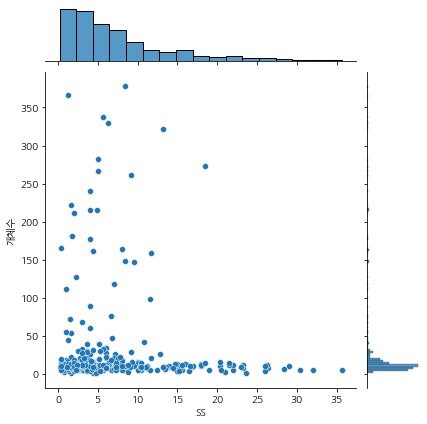

In [34]:
sns.jointplot('SS', '개체수', data=ss_data)
plt.show()

### PH 지표와 일별 관측된 총 개체수 상관관계 분석

In [35]:
ph_data = num_of_invert_by_month[['PH', '개체수']].dropna()
ph_data.shape

(300, 2)

In [36]:
spst.pearsonr(ph_data['PH'], ph_data['개체수'])

(0.01099967242104489, 0.8495204791717694)

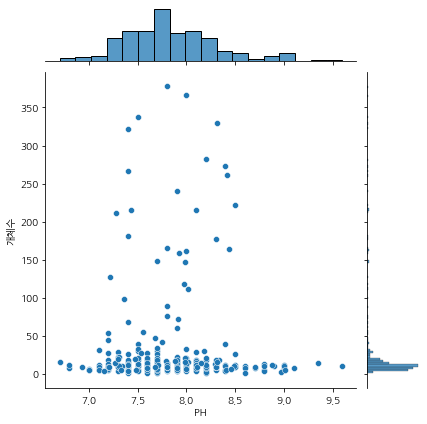

In [50]:
sns.jointplot('PH', '개체수', data=ph_data)
plt.show()

### T-N 지표와 일별 관측된 총 개체수 상관관계 분석

In [37]:
tn_data = num_of_invert_by_month[['T-N', '개체수']].dropna()
tn_data.shape

(299, 2)

In [38]:
spst.pearsonr(tn_data['T-N'], tn_data['개체수'])

(-0.21565460119298996, 0.00017147739240803742)

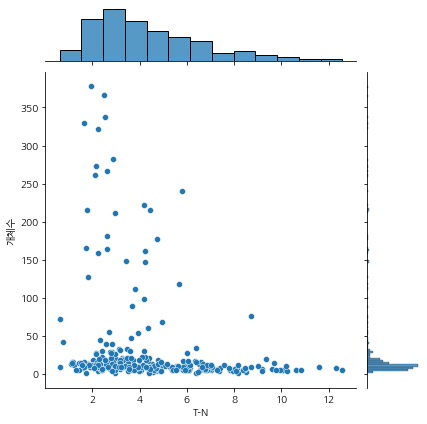

In [39]:
sns.jointplot('T-N', '개체수', data=tn_data)
plt.show()

### T-P 지표와 일별 관측된 총 개체수 상관관계 분석

In [40]:
tp_data = num_of_invert_by_month[['T-P', '개체수']].dropna()
tp_data.shape

(300, 2)

In [41]:
spst.pearsonr(tp_data['T-P'], tp_data['개체수'])

(-0.17944930232524997, 0.0018051564074726243)

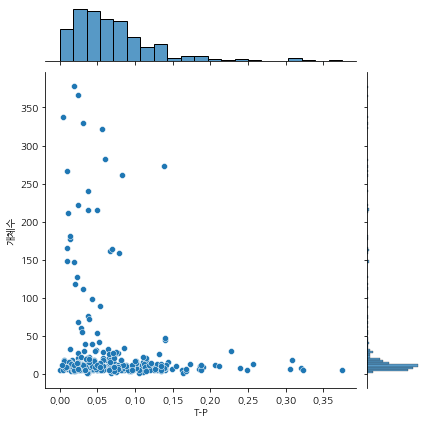

In [42]:
sns.jointplot('T-P', '개체수', data=tp_data)
plt.show()

### BOD 지표와 일별 관측된 총 개체수 상관관계 분석

In [43]:
bod_data = num_of_invert_by_month[['BOD', '개체수']].dropna()
bod_data.shape

(275, 2)

In [44]:
spst.pearsonr(bod_data['BOD'], bod_data['개체수'])

(-0.21463897671495005, 0.0003370211911399505)

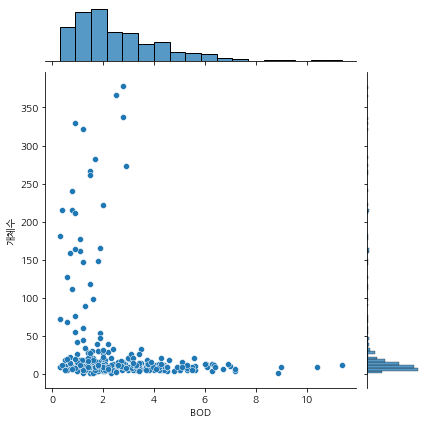

In [45]:
sns.jointplot('BOD', '개체수', data=bod_data)
plt.show()

### TOC 지표와 일별 관측된 총 개체수 상관관계 분석

In [46]:
toc_data = num_of_invert_by_month[['TOC', '개체수']].dropna()
toc_data.shape

(300, 2)

In [47]:
spst.pearsonr(toc_data['TOC'], toc_data['개체수'])

(-0.24450401799368654, 1.8486413059840555e-05)

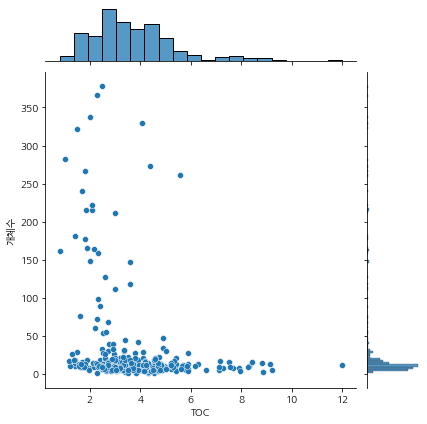

In [48]:
sns.jointplot('TOC', '개체수', data=toc_data)
plt.show()

In [49]:
num_of_invert_by_month.columns

Index(['조사연도', 'month', 'name', '개체수', 'year', 'PH', 'SS', 'T-N', 'T-P',
       'CHL-A', 'date', 'COD', 'TOC', 'DO', 'EC (MS/CM)', 'NH3-N (MG/L)', '수온',
       'BOD'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

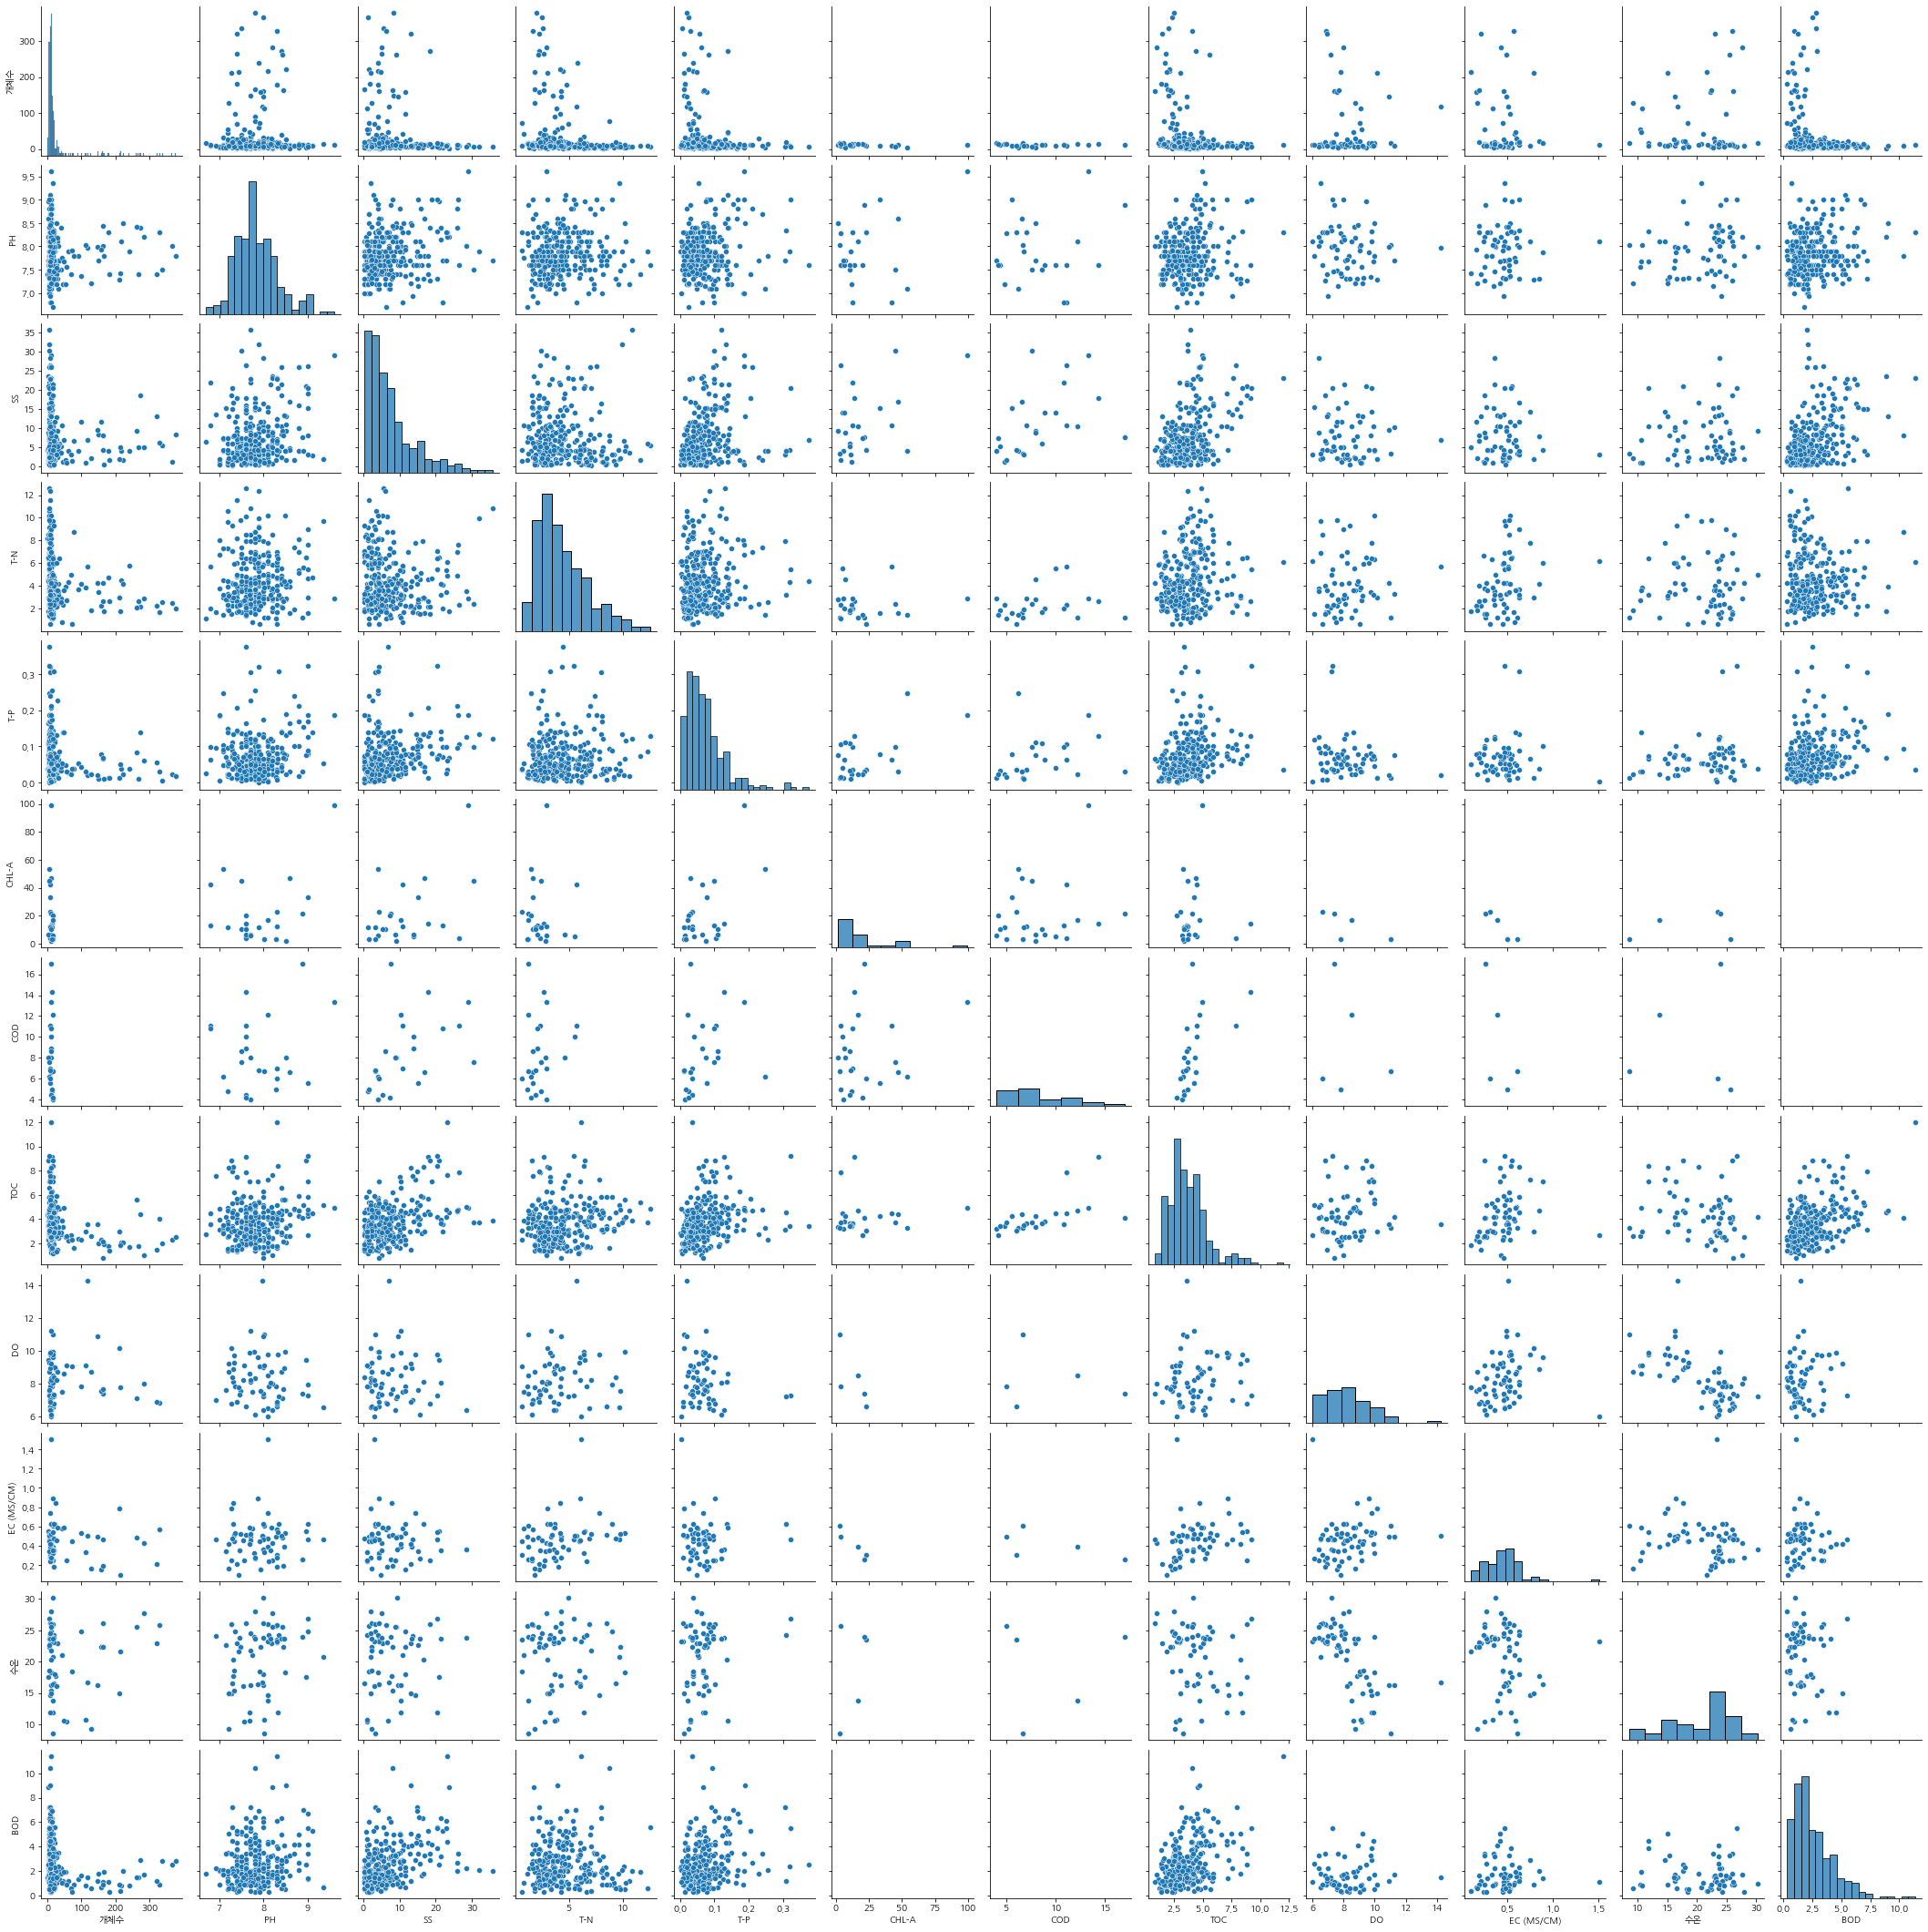

In [50]:
plt.figure(figsize=(20, 20))
sns.pairplot(num_of_invert_by_month.drop(columns=['조사연도', 'name', 'year', 'month']))
plt.show()

------

## **하천 수질에 따른 월별 관측된 개체종의 개수 분석**

In [51]:
num_of_species_by_month = copy.deepcopy(suwon_by_month)

In [52]:
num_of_species_by_month['year'] = num_of_species_by_month['조사일자'].dt.year
num_of_species_by_month['month'] = num_of_species_by_month['조사일자'].dt.month

In [53]:
num_of_species_by_month = num_of_species_by_month.groupby(by=['year', 'month', 'name'], as_index=False).count()
num_of_species_by_month = num_of_species_by_month[['year', 'month', 'name', '개체수']]

In [54]:
num_of_species_by_month = pd.merge(num_of_species_by_month, water, on=['name', 'month', 'year'])
num_of_species_by_month

,year,month,name,개체수,PH,SS,T-N,T-P,CHL-A,date,COD,TOC,DO,EC (MS/CM),NH3-N (MG/L),수온,BOD
0,2017,3,서호천_상류(배다리교),1,7.40,4.4,8.163139,0.037124,NaN,2017-03-01,NaN,4.3030,NaN,NaN,NaN,NaN,1.5
1,2017,3,서호천_중류(화산교),6,7.60,2.8,7.963648,0.022846,NaN,2017-03-01,NaN,4.1180,NaN,NaN,NaN,NaN,1.9
2,2017,3,서호천_하류(농대교),8,7.80,8.4,6.956811,0.058272,NaN,2017-03-01,NaN,4.9980,NaN,NaN,NaN,NaN,5.0
3,2017,3,수원천_상류(연화교),10,7.60,0.4,2.993023,0.011797,NaN,2017-03-01,NaN,1.8960,NaN,NaN,NaN,NaN,1.0
4,2017,3,수원천_중류(매세교),11,7.50,6.4,5.539535,0.136922,NaN,2017-03-01,NaN,2.2260,NaN,NaN,NaN,NaN,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020,11,수원천_하류(새터교),8,8.02,1.0,3.823100,0.031000,NaN,2020-11-01,NaN,2.9900,9.09,0.335,NaN,10.7,0.8
296,2020,11,원천천_상류(원천교),7,7.54,3.0,5.995000,0.070800,NaN,2020-11-01,NaN,5.8922,8.20,0.457,NaN,16.1,1.5
297,2020,11,원천천_중류(백년교),16,7.68,6.8,3.638100,0.139200,NaN,2020-11-01,NaN,4.9060,8.62,0.589,NaN,10.6,1.9
298,2020,11,황구지천_상류(금곡교),10,7.21,13.2,3.140200,0.054000,NaN,2020-11-01,NaN,8.2836,9.20,0.420,NaN,15.0,5.1


### SS 지표와 일별 관측된 총 개체수 상관관계 분석

In [55]:
ss_data = num_of_species_by_month[['SS', '개체수']].dropna()
ss_data.shape

(299, 2)

In [56]:
spst.pearsonr(ss_data['SS'], ss_data['개체수'])

(-0.016302520325498282, 0.7789138033158155)

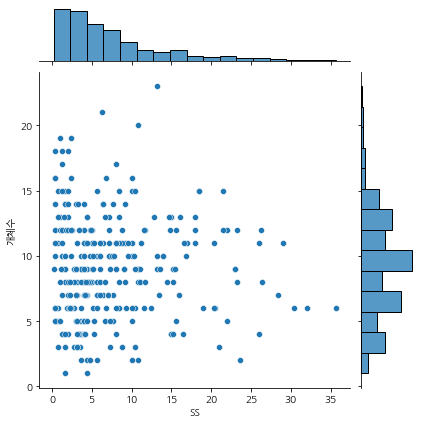

In [57]:
sns.jointplot('SS', '개체수', data=ss_data)
plt.show()

### PH 지표와 일별 관측된 총 개체수 상관관계 분석

In [58]:
ph_data = num_of_species_by_month[['PH', '개체수']].dropna()
ph_data.shape

(300, 2)

In [59]:
spst.pearsonr(ph_data['PH'], ph_data['개체수'])

(-0.04090367189904554, 0.48030618722540225)

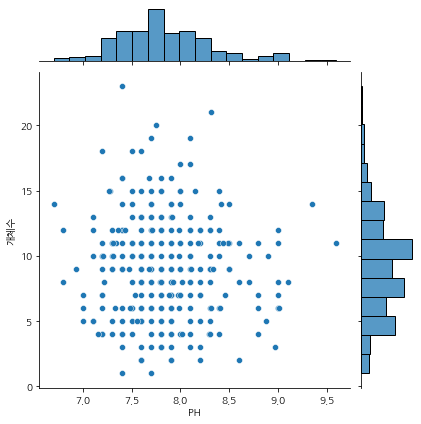

In [60]:
sns.jointplot('PH', '개체수', data=ph_data)
plt.show()

### T-N 지표와 일별 관측된 총 개체수 상관관계 분석

In [61]:
tn_data = num_of_species_by_month[['T-N', '개체수']].dropna()
tn_data.shape

(299, 2)

In [62]:
spst.pearsonr(tn_data['T-N'], tn_data['개체수'])

(-0.2863568551821439, 4.7362907096218554e-07)

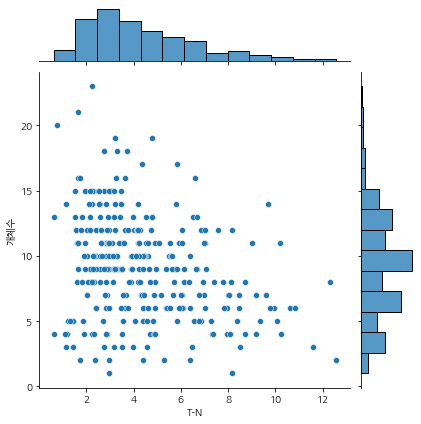

In [63]:
sns.jointplot('T-N', '개체수', data=tn_data)
plt.show()

### T-P 지표와 일별 관측된 총 개체수 상관관계 분석

In [64]:
tp_data = num_of_species_by_month[['T-P', '개체수']].dropna()
tp_data.shape

(300, 2)

In [65]:
spst.pearsonr(tp_data['T-P'], tp_data['개체수'])

(-0.06821463009264513, 0.23881566803526866)

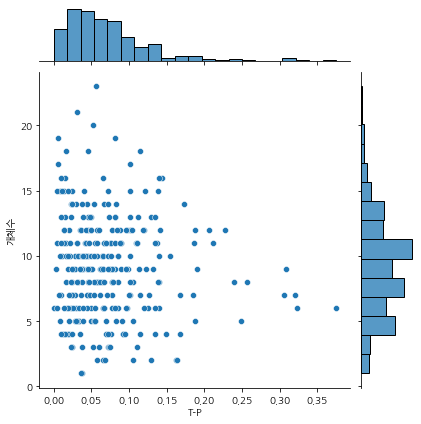

In [66]:
sns.jointplot('T-P', '개체수', data=tp_data)
plt.show()

### BOD 지표와 일별 관측된 총 개체수 상관관계 분석

In [67]:
bod_data = num_of_species_by_month[['BOD', '개체수']].dropna()
bod_data.shape

(275, 2)

In [68]:
spst.pearsonr(bod_data['BOD'], bod_data['개체수'])

(-0.053958757134547564, 0.3727261478811653)

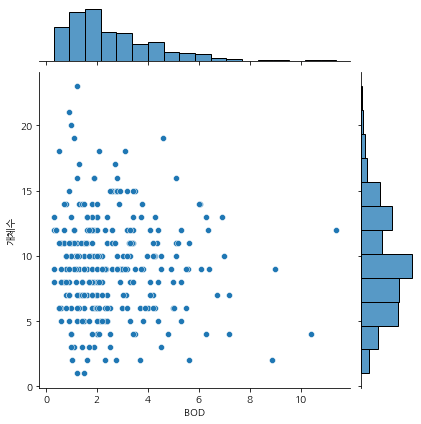

In [69]:
sns.jointplot('BOD', '개체수', data=bod_data)
plt.show()

### TOC 지표와 일별 관측된 총 개체수 상관관계 분석

In [70]:
toc_data = num_of_species_by_month[['TOC', '개체수']].dropna()
toc_data.shape

(300, 2)

In [71]:
spst.pearsonr(toc_data['TOC'], toc_data['개체수'])

(-0.16875740744385015, 0.0033698479525736055)

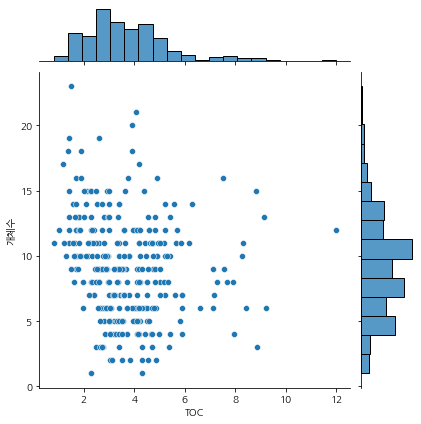

In [72]:
sns.jointplot('TOC', '개체수', data=toc_data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

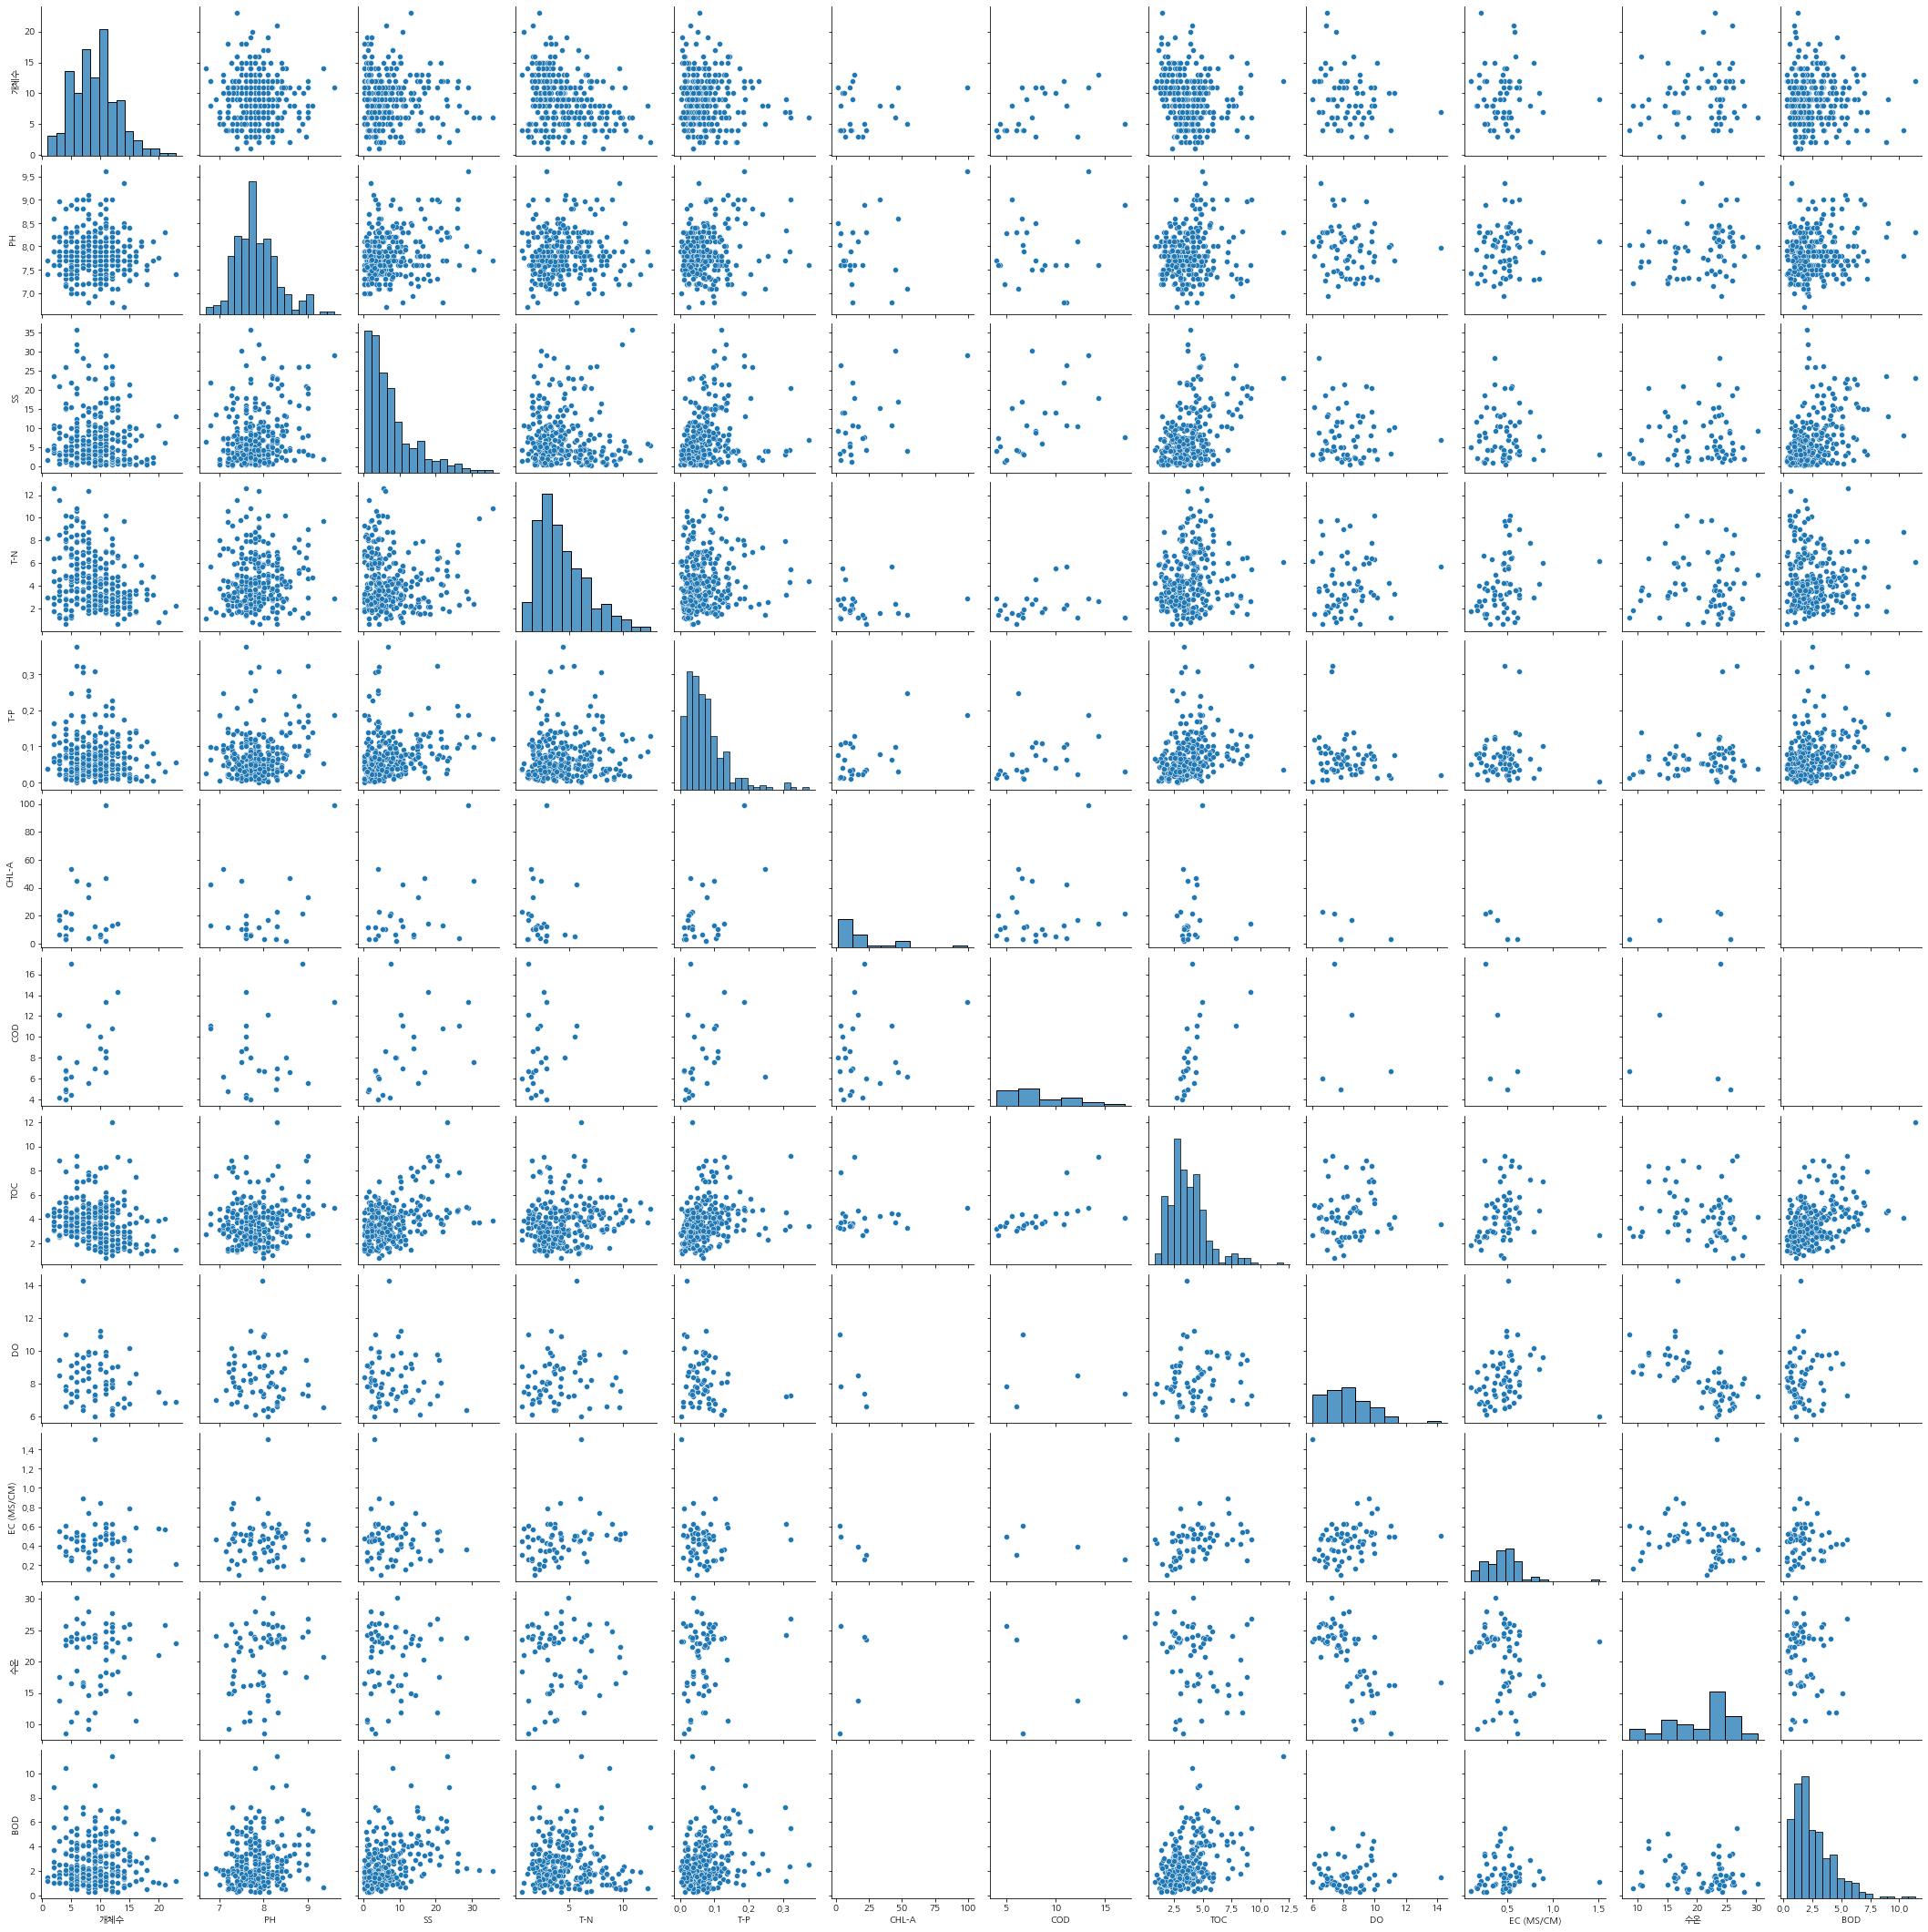

In [73]:
plt.figure(figsize=(20, 20))
sns.pairplot(num_of_species_by_month.drop(columns=['name', 'year', 'month']))
plt.show()